# Explore

### Imports

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from acquire import wrangle_store_data

import warnings
warnings.filterwarnings('ignore')
import prepare as p

# Store Item Demand

#### • Load your store item demand data using your acquire and/or prepare functions.

In [200]:
df = wrangle_store_data()
df.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [201]:
df = p.datetime_type(df,'sale_date')


In [202]:
df = p.set_date_to_index(df,'sale_date')

In [203]:
df = p.multiply_columns_addto_df(df,'sales_total' ,'item_price','sale_amount')

In [204]:
# add month name and day and year name to columns
df = p.add_date_column_string(df,'month_name', string='%B')
df = p.add_date_column_string(df,'day_name','%A')
df = p.add_date_column_string(df,'year','%Y')

In [205]:
df

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,sales_total,month_name,day_name,year
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92,January,Tuesday,2013
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,30.16,January,Tuesday,2013
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,308.48,January,Tuesday,2013
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,197.55,January,Tuesday,2013
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,25.16,January,Tuesday,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,7,39,28400029254,28400029254,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,706662,31,12018 Perrin Beitel Rd,78217,San Antonio,TX,279.62,December,Sunday,2017
2017-12-31,7,40,42272008063,42272008063,Amys,Amys Light & Lean Spaghetti Italiano,0.60,724922,22,12018 Perrin Beitel Rd,78217,San Antonio,TX,13.20,December,Sunday,2017
2017-12-31,7,41,31000670016,31000670016,P.f. Changs,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,743182,19,12018 Perrin Beitel Rd,78217,San Antonio,TX,106.78,December,Sunday,2017


In [206]:
df.index.value_counts().sort_index()

2013-01-01    500
2013-01-02    500
2013-01-03    500
2013-01-04    500
2013-01-05    500
             ... 
2017-12-27    500
2017-12-28    500
2017-12-29    500
2017-12-30    500
2017-12-31    500
Name: sale_date, Length: 1826, dtype: int64

### 1. Using a human-based approach, split your dataset into train and test sets.

In [207]:
# human-based approach
train = df[:'2016'] # includes 2016
test = df['2017']

### 2. Visualize your train-test split.

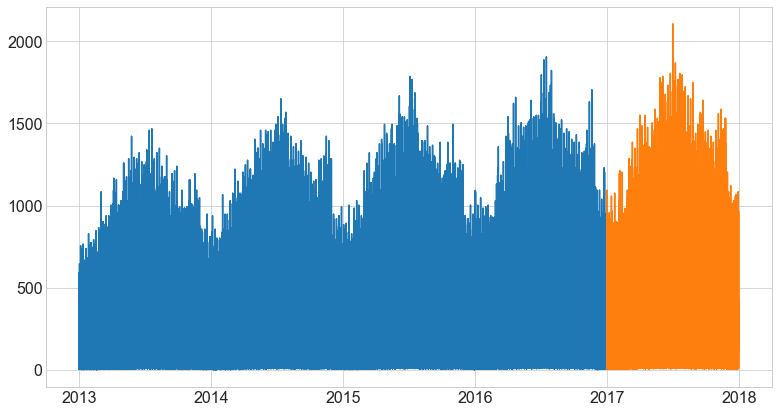

In [208]:
train = df[:'2016'] # includes 2016
test = df['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total);


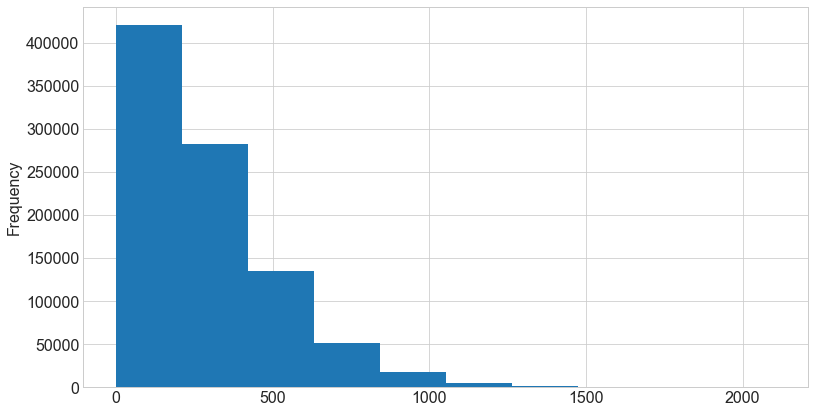

In [209]:
df.sales_total.plot.hist();

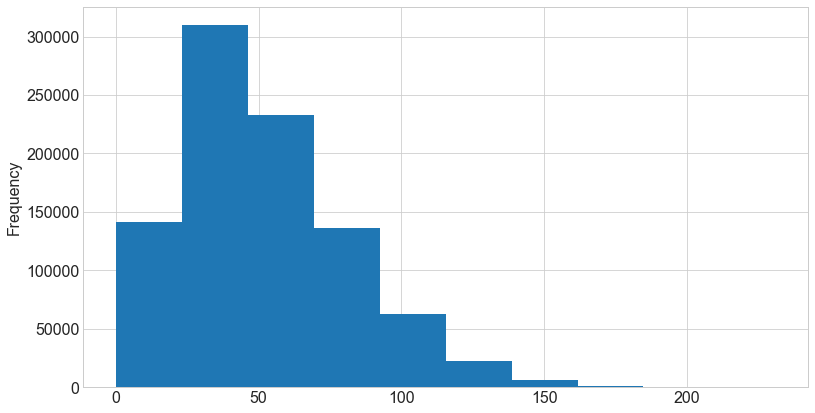

In [210]:
df.sale_amount.plot.hist();

<AxesSubplot:xlabel='sale_date'>

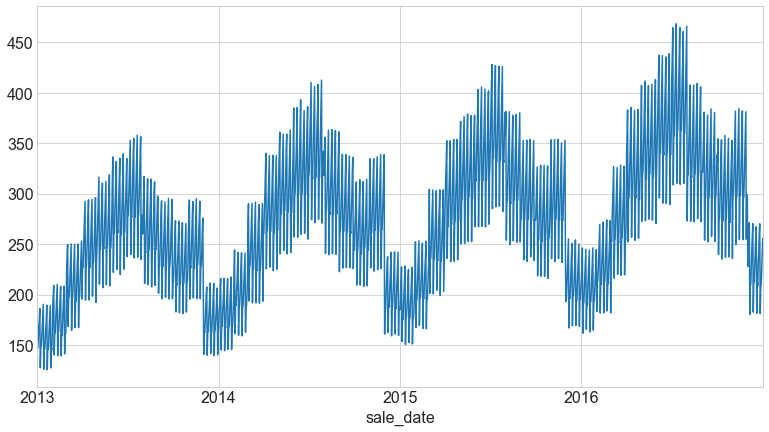

In [214]:
train.resample('D').sales_total.mean().plot()

#### • Only use your train data set to perform the following tasks:

### 3. Resample your data and visualize it.

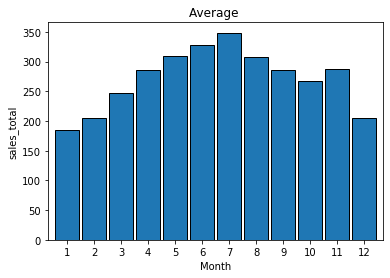

In [13]:
ax = train.groupby(train.index.month).sales_total.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average ', xlabel='Month', ylabel='sales_total');

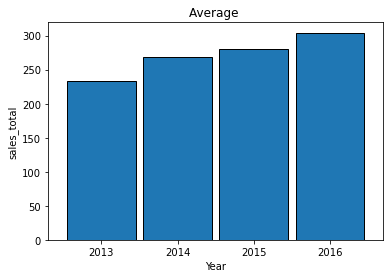

In [14]:
ax = train.groupby(train.index.year).sales_total.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average ', xlabel='Year', ylabel='sales_total');

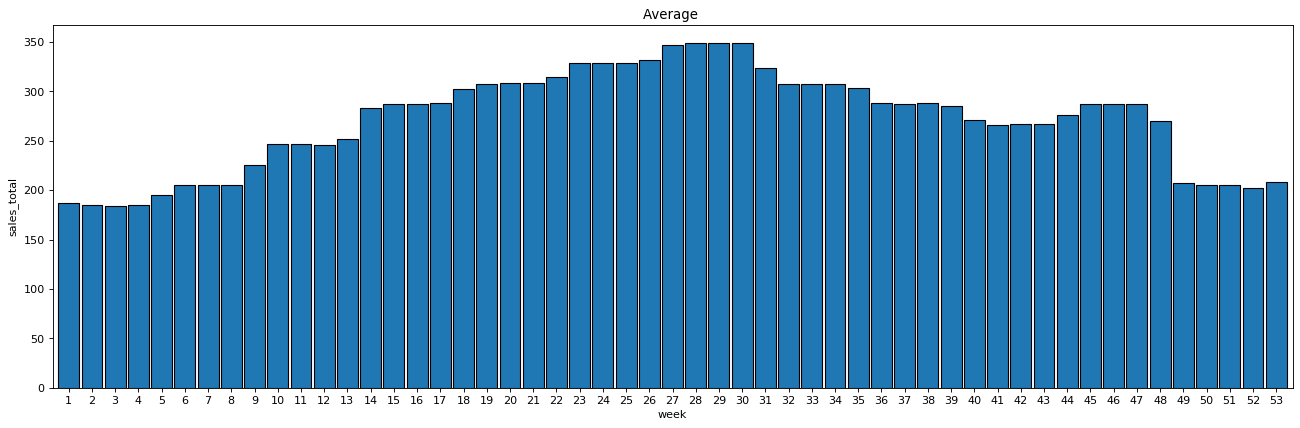

In [15]:
plt.figure(figsize=(20, 6), dpi=80)
ax = train.groupby(train.index.week).sales_total.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average ', xlabel='week', ylabel='sales_total');

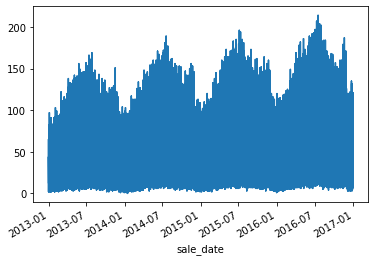

In [16]:
train.sale_amount.plot();

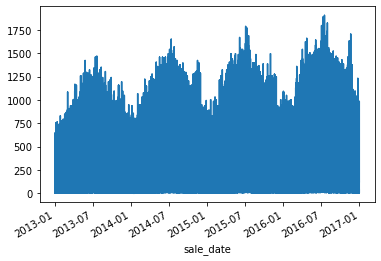

In [17]:
train.sales_total.plot();

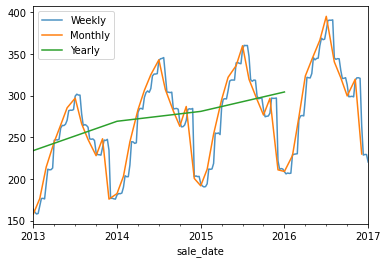

In [18]:
# resample with week , month, year
train.sales_total.resample('W').mean().plot(alpha=.8, label='Weekly')
train.sales_total.resample('M').mean().plot(label='Monthly')
train.sales_total.resample('Y').mean().plot(label='Yearly')
plt.legend()

### 4. Creating a rolling (moving) average of your data and visualize it.

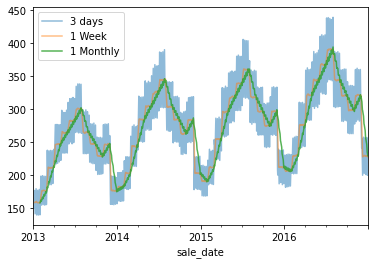

In [19]:
train.sales_total.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 days')
train.sales_total.resample('D').mean().rolling(7).mean().plot(alpha=.5, label='1 Week')
train.sales_total.resample('D').mean().rolling(30).mean().plot(alpha=.8, label='1 Monthly')
#train.sales_total.resample('Y').mean().rolling(7).mean().plot(alpha=.8, label='1 Yearly')
plt.legend()

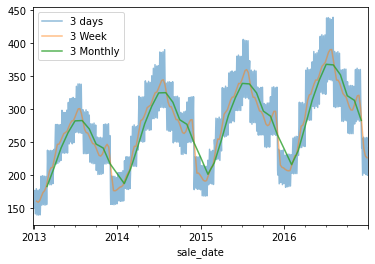

In [22]:
train.sales_total.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 days')
train.sales_total.resample('w').mean().rolling(3).mean().plot(alpha=.5, label='3 Week')
train.sales_total.resample('M').mean().rolling(3).mean().plot(alpha=.8, label='3 Monthly')
#train.sales_total.resample('Y').mean().rolling(7).mean().plot(alpha=.8, label='1 Yearly')
plt.legend();

### 5. Plot the difference in sales from one day to the next.

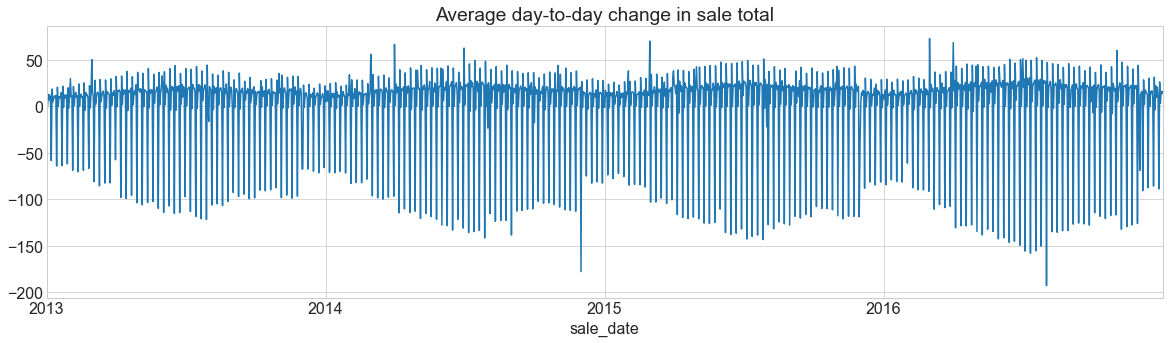

In [218]:
plt.figure(figsize =(20,5))
train.sales_total.resample('D').mean().diff().plot(title='Average day-to-day change in sale total');


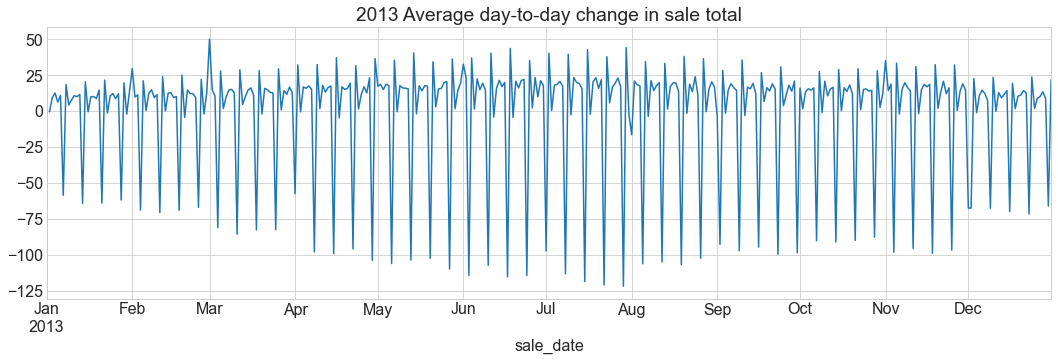

In [221]:
plt.figure(figsize =(18,5))
train['2013'].sales_total.resample('D').mean().diff().plot(title='2013 Average day-to-day change in sale total');

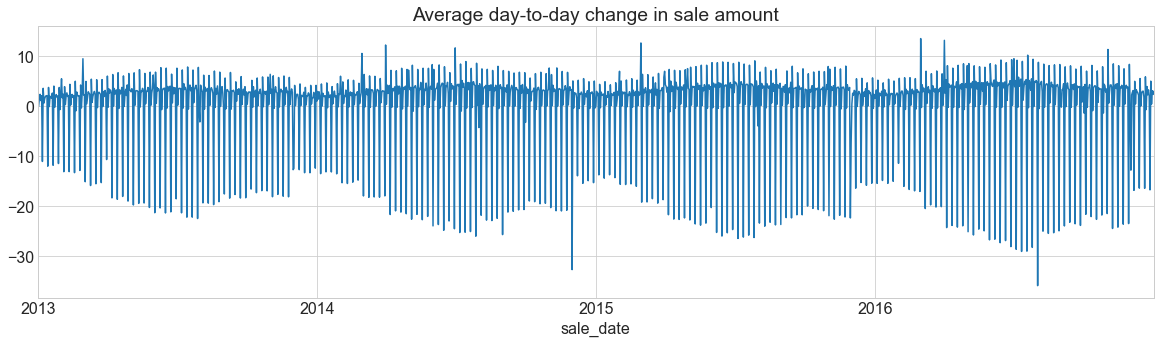

In [222]:
plt.figure(figsize =(20,5))
train.sale_amount.resample('D').mean().diff().plot(title = 'Average day-to-day change in sale amount');

In [223]:
train.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,sales_total,month_name,day_name,year
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92,January,Tuesday,2013
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,30.16,January,Tuesday,2013
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,308.48,January,Tuesday,2013
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,197.55,January,Tuesday,2013
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,25.16,January,Tuesday,2013


### 6. Plot the % difference in sales from one day to the next.

In [224]:
train.head(10)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,sales_total,month_name,day_name,year
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92,January,Tuesday,2013
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,30.16,January,Tuesday,2013
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,308.48,January,Tuesday,2013
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,197.55,January,Tuesday,2013
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,25.16,January,Tuesday,2013
2013-01-01,3,20,204040000000,204040000000,Usda Produce,Plums Black,5.62,350593,29,2118 Fredericksburg Rdj,78201,San Antonio,TX,162.98,January,Tuesday,2013
2013-01-01,10,6,74170388732,74170388732,Sally Hansen,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,107735,32,8503 NW Military Hwy,78231,San Antonio,TX,221.76,January,Tuesday,2013
2013-01-01,3,21,753950001954,753950001954,Doctors Best,Doctors Best Best Curcumin C3 Complex 1000mg T...,8.09,368853,25,2118 Fredericksburg Rdj,78201,San Antonio,TX,202.25,January,Tuesday,2013
2013-01-01,3,22,16000288829,16000288829,Betty Crocker,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,387113,50,2118 Fredericksburg Rdj,78201,San Antonio,TX,365.50,January,Tuesday,2013


In [225]:
daily_sales_amount = train.resample('D').mean()

In [226]:
y= daily_sales_amount.sales_total

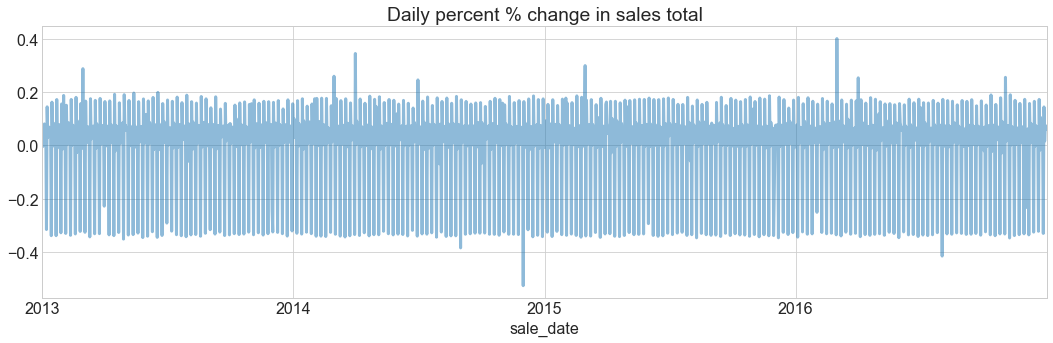

In [229]:
plt.figure(figsize =(18,5))
(y.diff() / y.shift()).plot(alpha=.5, lw=3, title='Daily percent % change in sales total' );

### 7. Plot the % difference in sales from one week to the next.

In [230]:
weekly= train.resample('W').mean()

In [231]:
y=weekly.sales_total

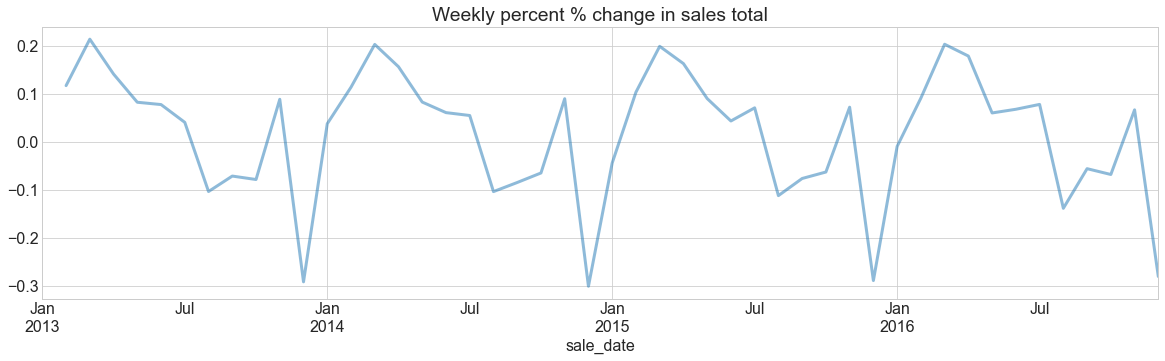

In [236]:
plt.figure(figsize =(20,5))
(y.diff() / y.shift()).plot(alpha=.5, lw=3, title='Weekly percent % change in sales total' );

### 8. Plot the % difference in sales from one month to the next.

In [233]:
monthly = train.resample("M").mean()
y=monthly.sales_total

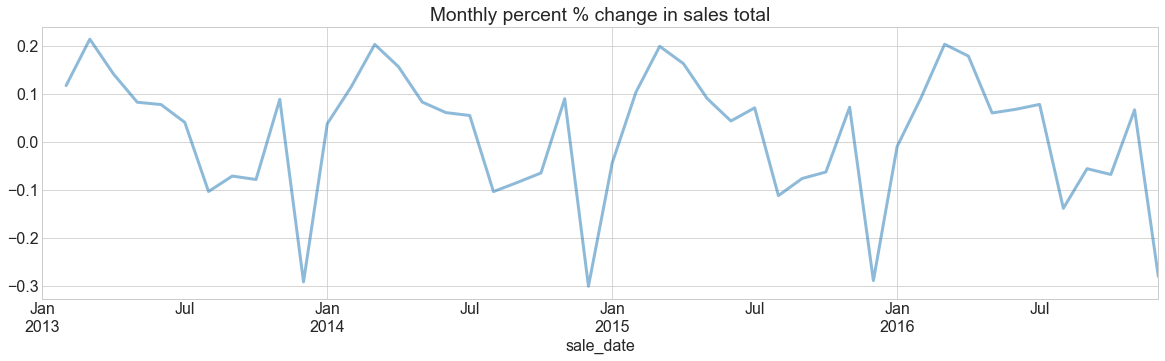

In [237]:
plt.figure(figsize =(20,5))
(y.diff() / y.shift()).plot(alpha=.5, lw=3, title='Monthly percent % change in sales total' );

### 9. Visualize an autocorrelation plot on a weekly resampling.

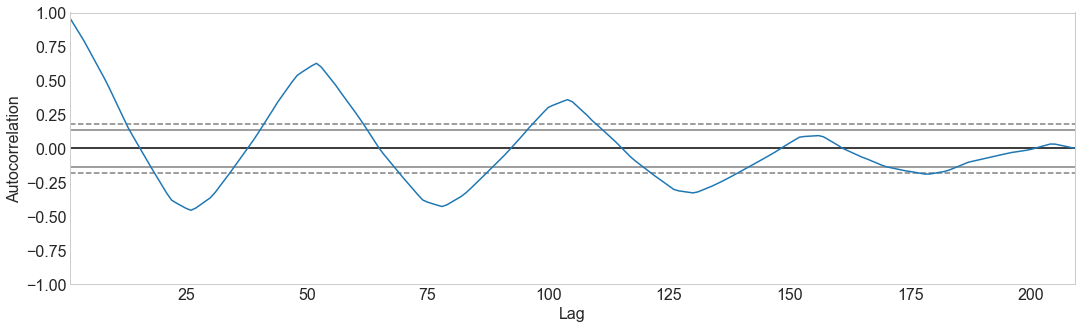

In [238]:
plt.figure(figsize =(18,5))
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean());

### 10. Visualize a seasonal decomposition plot on a weekly resampling

In [137]:
# resample by week 
y = train.sales_total.resample('W').mean()

# create decomposition object
decomposition = sm.tsa.seasonal_decompose(y)
decomposition

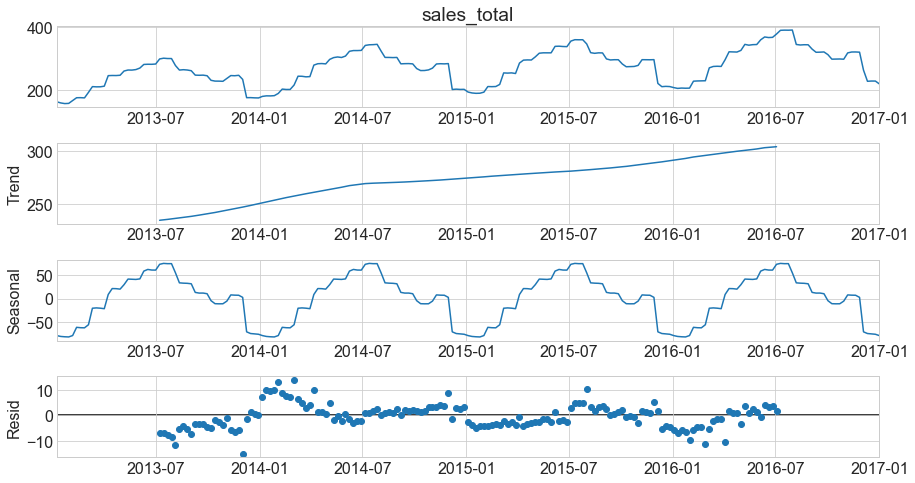

In [138]:
# plot decompostion
decomposition.plot();

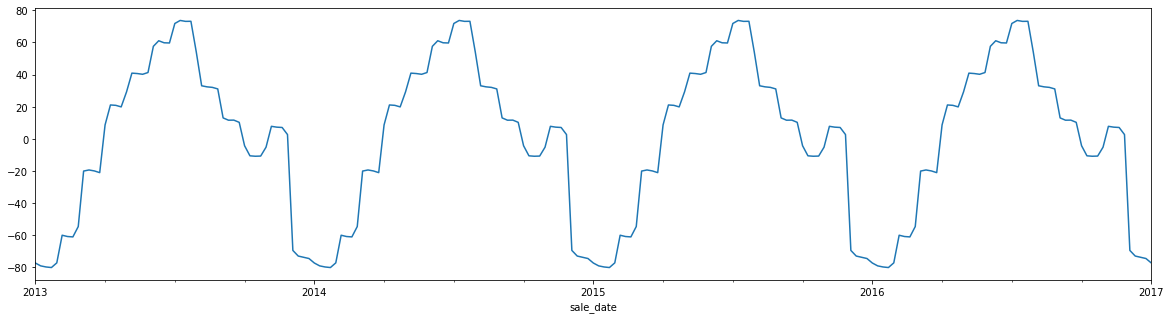

In [121]:
# plot decomposition seasonal
plt.figure(figsize =(20,5))
decomposition.seasonal.plot();


In [131]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': decomposition.observed,
    'trend': decomposition.trend,
    'seasonal': decomposition.seasonal,
    'resid': decomposition.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.589167,NaN,-77.434789,NaN
2013-01-13,159.981203,NaN,-79.225757,NaN
2013-01-20,157.946720,NaN,-79.904284,NaN
2013-01-27,158.545383,NaN,-80.259357,NaN
2013-02-03,167.585014,NaN,-77.352692,NaN


In [134]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

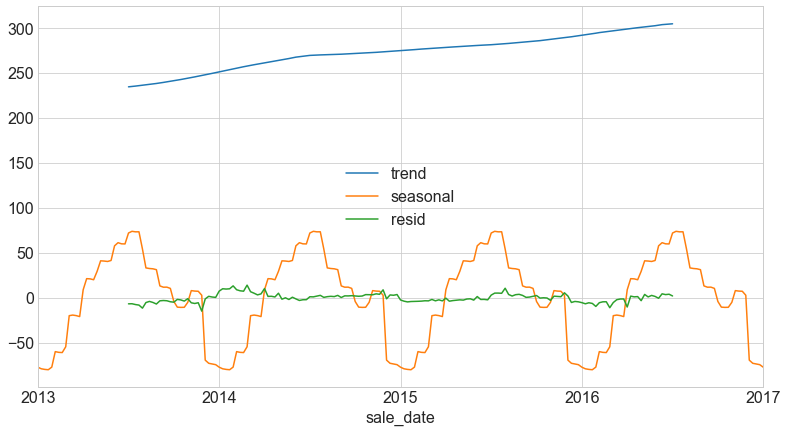

In [135]:
# plot using data frame
decomposition.iloc[:, 1:].plot();

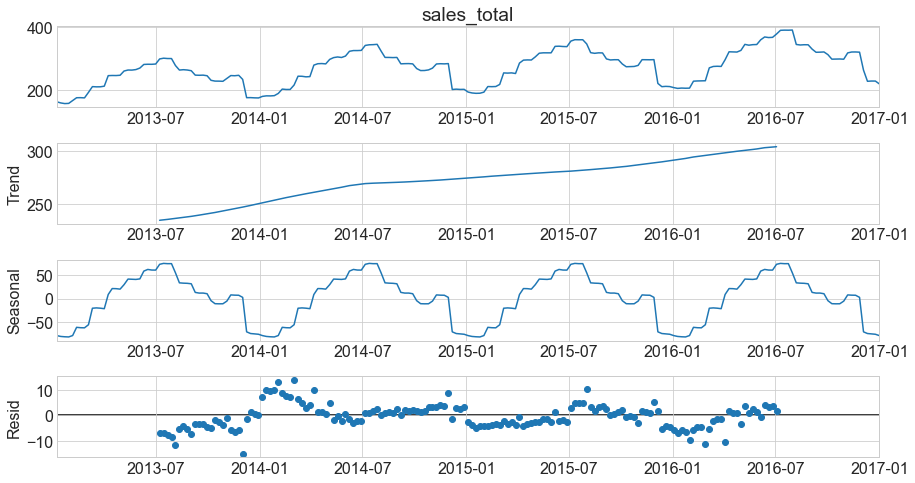

In [139]:
# the value returned from seasonal_decompose can itself be plotted:
decomposition.plot()
None

### Seasonal Subseries Plot

In [240]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

In [241]:
# This is actually the same pivot table as above, but months are on the top and years are on the left
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,157.894723,176.411855,214.181650,244.460082,264.663123,285.261279,296.881241,266.183375,247.237694,227.868064,248.108656,175.753692
2014,182.410791,203.207122,244.488991,282.786091,306.267538,324.965376,342.849100,307.345466,281.350430,263.133772,286.821036,200.538977
2015,191.725206,211.589839,253.739390,295.147608,321.813672,335.850784,359.698008,319.435676,295.088416,276.572155,296.583045,210.886208
2016,208.900519,227.977512,274.367406,323.461873,342.986382,366.316222,394.953287,340.315372,321.333920,299.518321,319.532559,229.882967


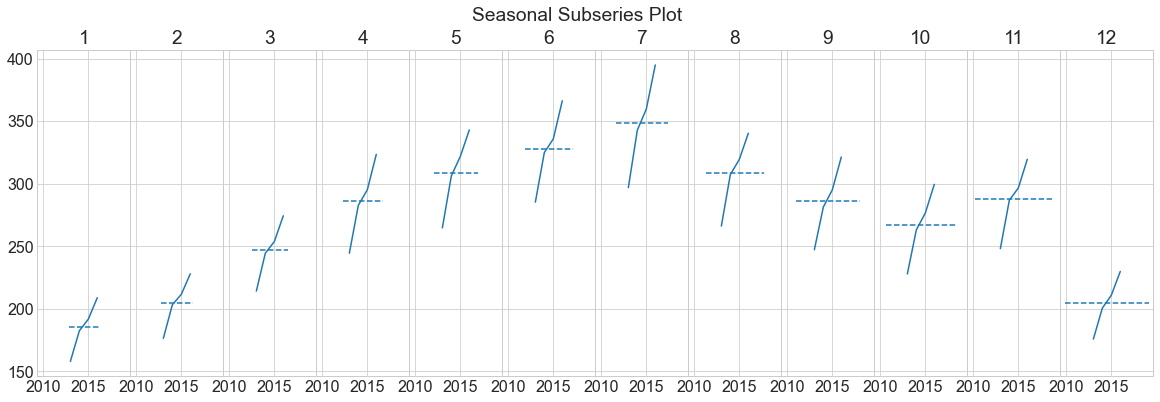

In [242]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True,figsize=(20, 6))

for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')


fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

# OPS data with Cross-Validated Splitting Using `sklearn`

* Load your OPS data using your acquire and/or prepare functions.

In [245]:
ops = pd.read_csv("opsd_germany_daily.csv")

In [246]:
ops.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [247]:
ops.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [248]:
def get_ops(ops):

    ops = p.datetime_type(ops,'Date')
    ops = p.set_date_to_index(ops, "Date")
    ops= p.add_date_column_string(ops,'day_name', string='%A')
    ops= p.add_date_column_string(ops,'month_name', string='%B')
    ops= p.add_date_column_string(ops,'year', string='%Y')
    p.fillna(ops)
    return ops

In [249]:

ops = get_ops(ops)
ops
   

,Consumption,Wind,Solar,Wind+Solar,day_name,month_name,year
Date,,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,Sunday,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,Monday,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,Tuesday,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,Wednesday,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,Thursday,January,2006
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,Wednesday,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,Thursday,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,Friday,December,2017


### 1. Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test.

#### Cross-Validated Splitting Using `sklearn`

In [250]:
from sklearn.model_selection import TimeSeriesSplit

n_splits = 3
tscv = TimeSeriesSplit(n_splits)

In [251]:
for train_index, test_index in tscv.split(ops):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(f"Length of TRAIN: {len(train_index)}", f"Length of TEST: {len(test_index)}", "\n")

TRAIN: [   0    1    2 ... 1095 1096 1097] TEST: [1098 1099 1100 ... 2190 2191 2192]
Length of TRAIN: 1098 Length of TEST: 1095 

TRAIN: [   0    1    2 ... 2190 2191 2192] TEST: [2193 2194 2195 ... 3285 3286 3287]
Length of TRAIN: 2193 Length of TEST: 1095 

TRAIN: [   0    1    2 ... 3285 3286 3287] TEST: [3288 3289 3290 ... 4380 4381 4382]
Length of TRAIN: 3288 Length of TEST: 1095 



* Only use the train data set to perform the following tasks:

### 2. Visualize your train-test split.

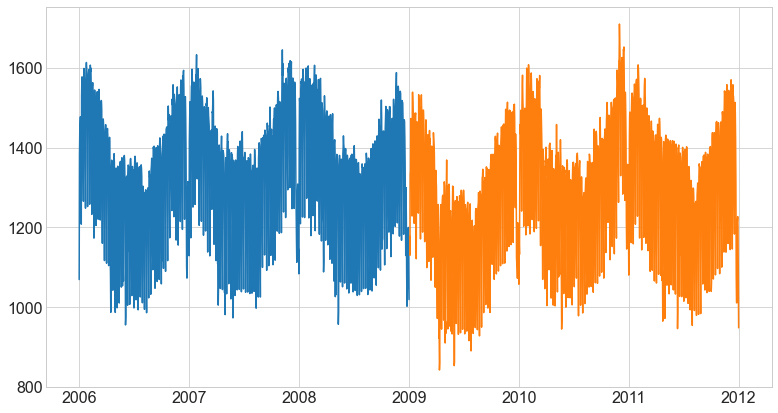

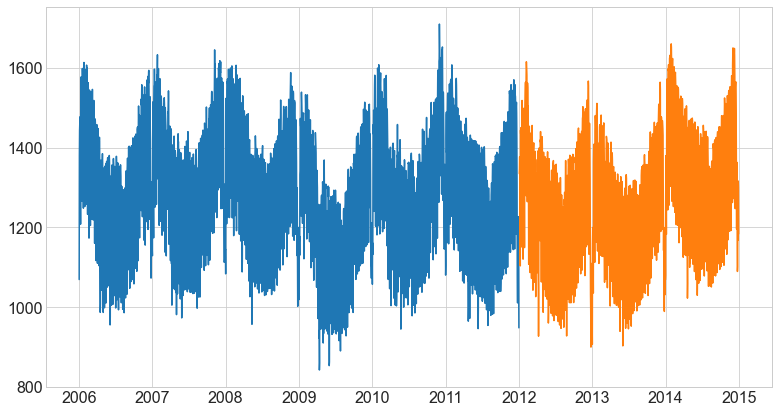

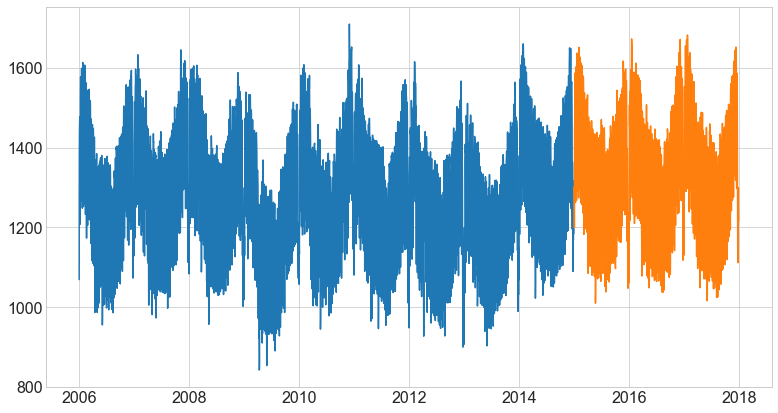

In [252]:
for train_index, test_index in tscv.split(ops):
    train = ops[:train_index[-1]]
    test = ops[test_index[0]:test_index[-1]]

    train_by_date = train.groupby(['Date']).Consumption.sum().reset_index()
    #train_by_date.plot(x='sale_date', y='sale_amount')

    test_by_date = test.groupby(['Date']).Consumption.sum().reset_index()
    #test_by_date.plot(x='sale_date', y='sale_amount')

    plt.plot(train_by_date.Date, train_by_date.Consumption)
    plt.plot(test_by_date.Date, test_by_date.Consumption)
    plt.show()

### 3. Plot the consumption, wind, and solar data on the same chart.

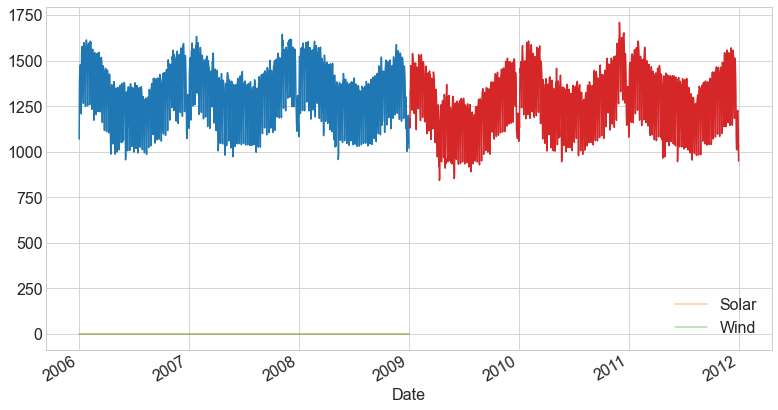

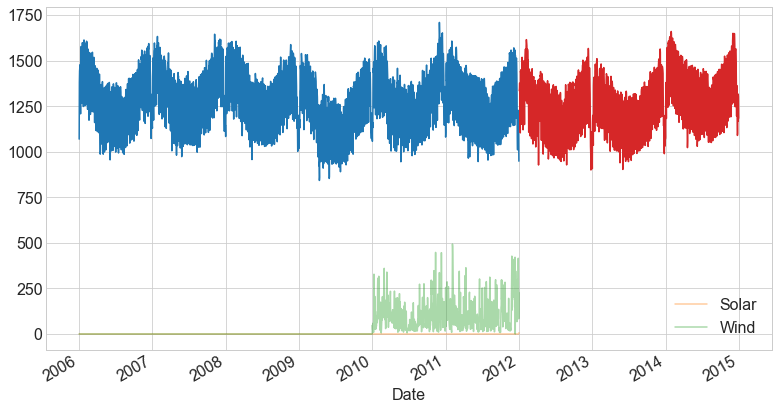

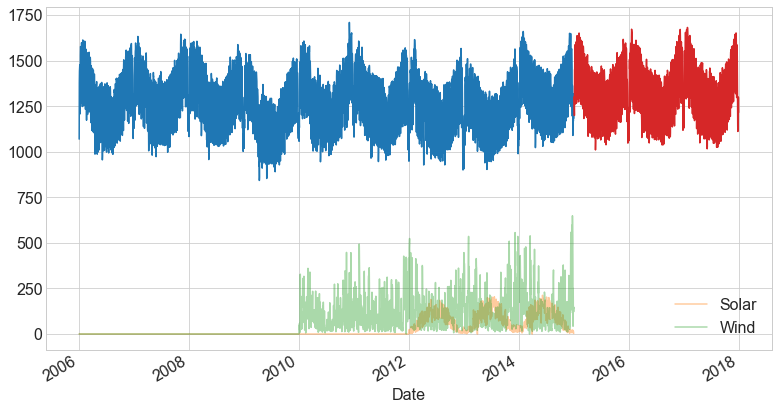

In [286]:
for train_index, test_index in tscv.split(ops):
    train = ops[:train_index[-1]]
    test = ops[test_index[0]:test_index[-1]]

    train_by_date = train.groupby(['Date']).Consumption.sum().reset_index()
    #train_by_date.plot(x='sale_date', y='sale_amount')

    test_by_date = test.groupby(['Date']).Consumption.sum().reset_index()
    #test_by_date.plot(x='sale_date', y='sale_amount')

    plt.plot(train_by_date.Date, train_by_date.Consumption)
    train.Solar.plot(alpha=0.4)
    train.Wind.plot(alpha =.4)

    #plt.plot(train_by_date.Date, train_by_date.Wind)
    #plt.plot(train_by_date.Date, train_by_date.Solar)
    plt.plot(test_by_date.Date, test_by_date.Consumption)
    plt.legend()
    plt.show()

<AxesSubplot:xlabel='Date'>

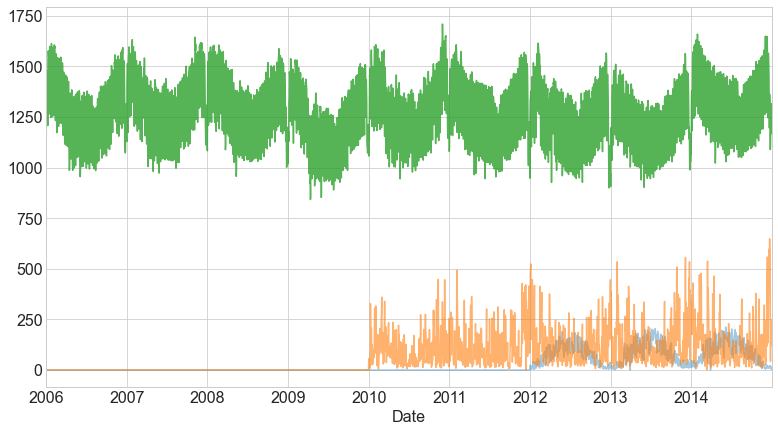

In [254]:
train.Solar.plot(alpha=.4)
train.Wind.plot(alpha=.6)
train.Consumption.plot(alpha = .8)

### 4. Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.

<AxesSubplot:xlabel='Date'>

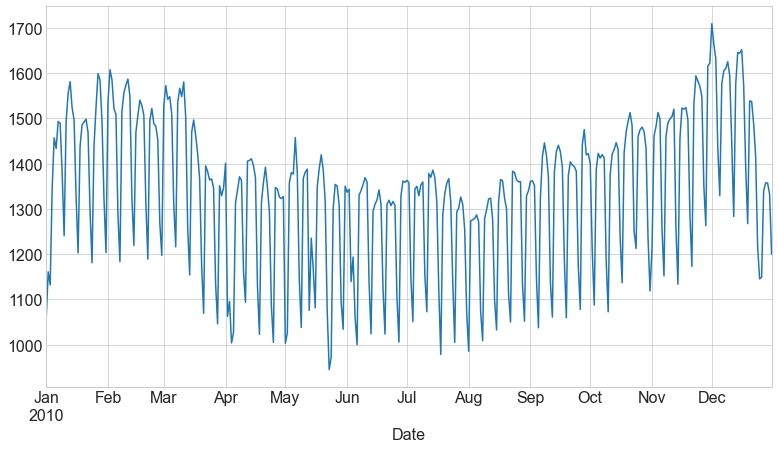

In [255]:
train['2010'].Consumption.plot()

There is less comsumption from April till september. There is an increase starting in September up to December.

### 5. Resample the consumption data to monthly and plot it.

In [256]:
monthly = train.resample('m').mean()

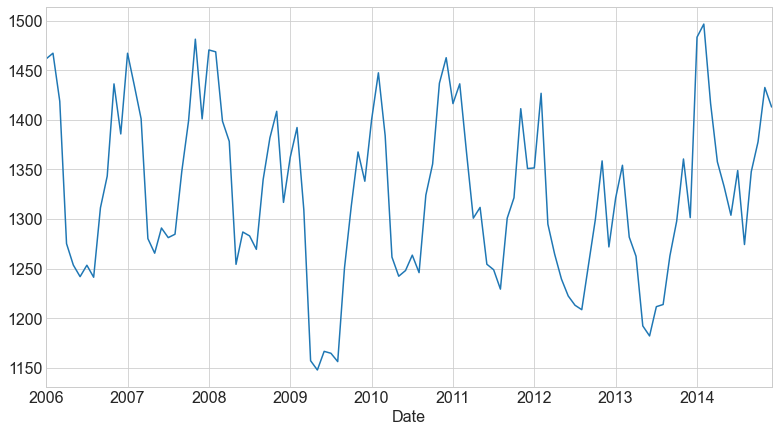

In [257]:
monthly.Consumption.plot();

Drop in energy from 2009 til 2010.


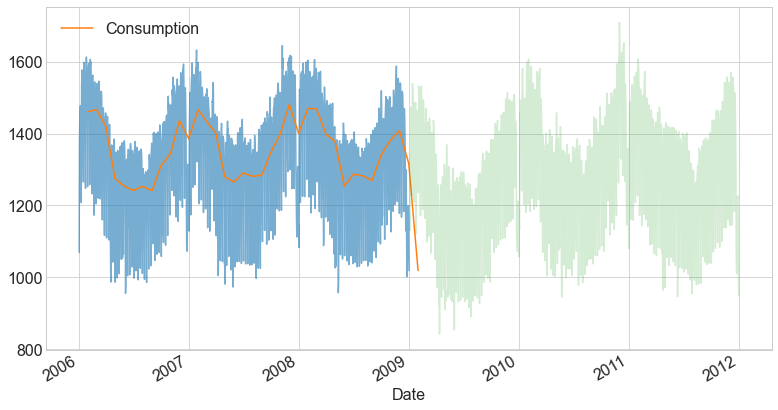

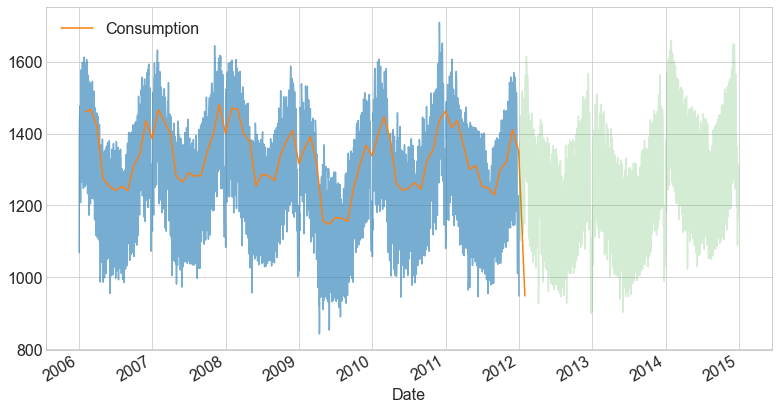

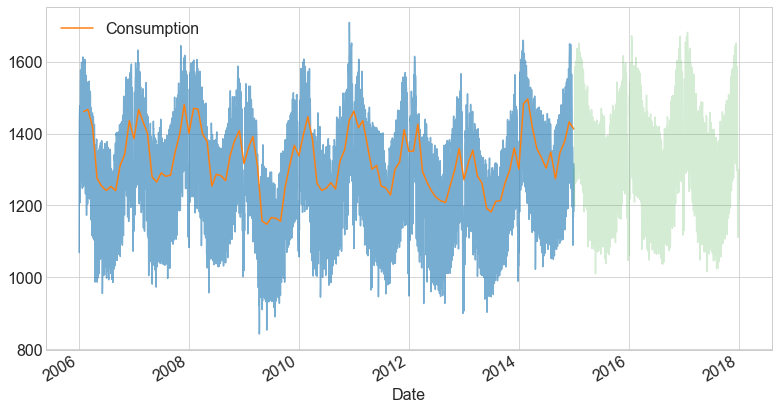

In [258]:
for train_index, test_index in tscv.split(ops):
    train = ops[:train_index[-1]]
    test = ops[test_index[0]:test_index[-1]]

    train_by_date = train.groupby(['Date']).Consumption.sum().reset_index()
    #train_by_date.plot(x='sale_date', y='sale_amount')

    test_by_date = test.groupby(['Date']).Consumption.sum().reset_index()
    #test_by_date.plot(x='sale_date', y='sale_amount')

    plt.plot(train_by_date.Date, train_by_date.Consumption, alpha = .6)
    monthly = train.resample('m').mean()
    monthly.Consumption.plot();


    #plt.plot(train_by_date.Date, train_by_date.Wind)
    #plt.plot(train_by_date.Date, train_by_date.Solar)
    plt.plot(test_by_date.Date, test_by_date.Consumption, alpha = .2)
    plt.legend()
    plt.show()

<AxesSubplot:xlabel='Date', ylabel='Consumption'>

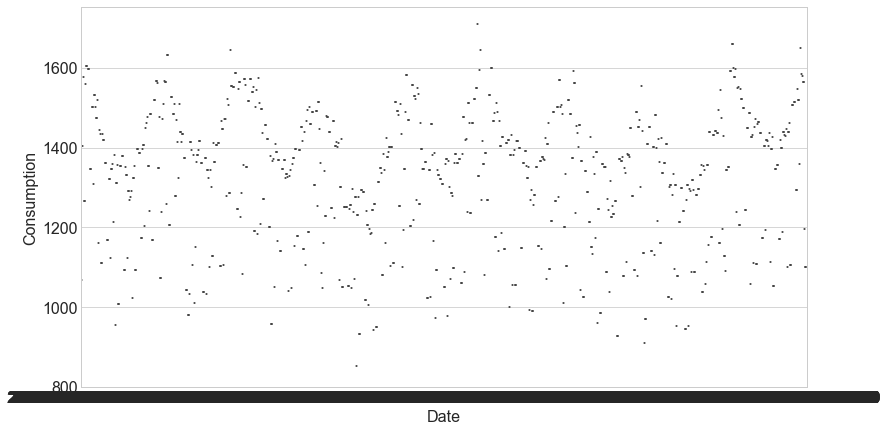

In [282]:
sns.boxplot(x=train.index, y='Consumption', data =train)

In [279]:
train

,Consumption,Wind,Solar,Wind+Solar,day_name,month_name,year
Date,,,,,,,
2006-01-01,1069.184,0.000,0.000,0.000,Sunday,January,2006
2006-01-02,1380.521,0.000,0.000,0.000,Monday,January,2006
2006-01-03,1442.533,0.000,0.000,0.000,Tuesday,January,2006
2006-01-04,1457.217,0.000,0.000,0.000,Wednesday,January,2006
2006-01-05,1477.131,0.000,0.000,0.000,Thursday,January,2006
...,...,...,...,...,...,...,...
2014-12-27,1198.834,249.906,7.521,257.427,Saturday,December,2014
2014-12-28,1168.079,137.846,15.524,153.370,Sunday,December,2014
2014-12-29,1316.093,148.966,5.221,154.187,Monday,December,2014


### 6. Resample the consumption data to yearly and plot it.

In [259]:
yearly = train.resample('Y').mean()

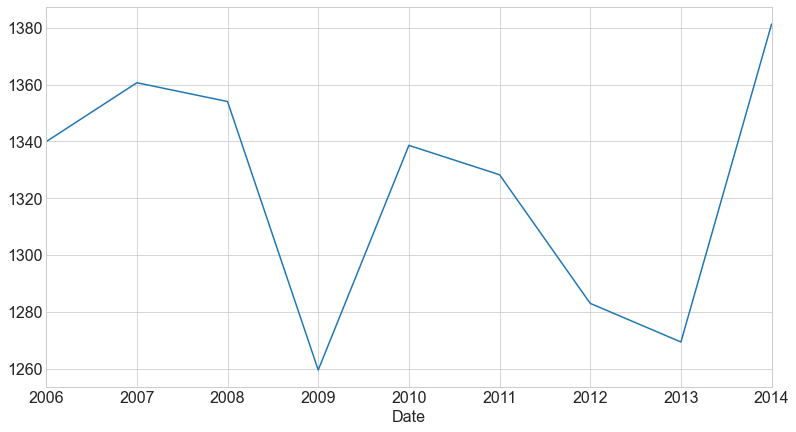

In [260]:
yearly.Consumption.plot();

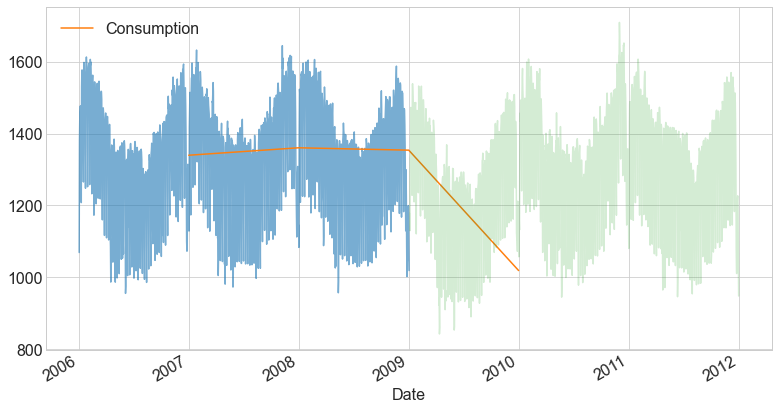

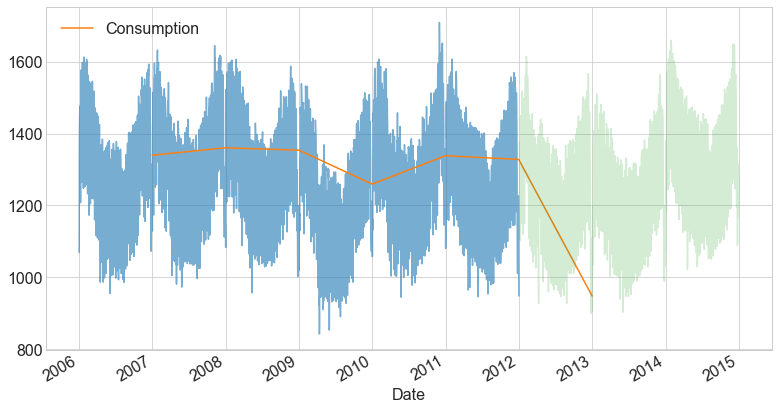

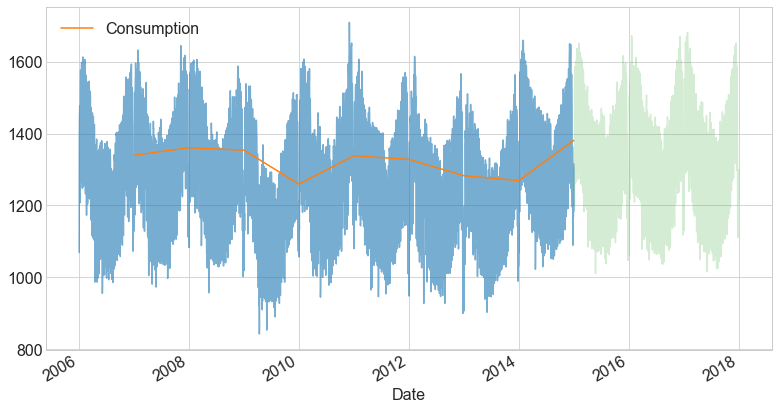

In [277]:
for train_index, test_index in tscv.split(ops):
    train = ops[:train_index[-1]]
    test = ops[test_index[0]:test_index[-1]]

    train_by_date = train.groupby(['Date']).Consumption.sum().reset_index()
    #train_by_date.plot(x='sale_date', y='sale_amount')

    test_by_date = test.groupby(['Date']).Consumption.sum().reset_index()
    #test_by_date.plot(x='sale_date', y='sale_amount')

    plt.plot(train_by_date.Date, train_by_date.Consumption,alpha =.6)
    yearly = train.resample('Y').mean()
    yearly.Consumption.plot();


    #plt.plot(train_by_date.Date, train_by_date.Wind)
    #plt.plot(train_by_date.Date, train_by_date.Solar)
    plt.plot(test_by_date.Date, test_by_date.Consumption,alpha = 0.2)
    plt.legend()
    plt.show()

### Seasonal Subseries Plot

In [263]:
y = train.Consumption
y.head()

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: Consumption, dtype: float64

In [265]:
# This is actually the same pivot table as above, but months are on the top and years are on the left
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table


Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1416.458355,1357.582700,1332.490710,1303.712233,1348.810258,1274.170968,1347.642400,1377.754355,1432.526667,1412.856161


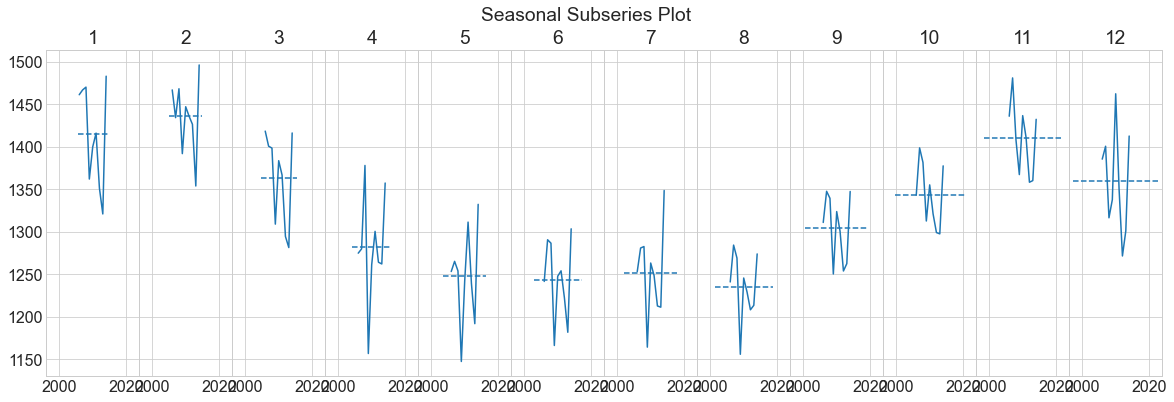

In [266]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True,figsize=(20, 6))


for ax, (month, subset) in zip(axs, table.iteritems()):
    
    
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')


fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

# OPS with a human split

In [290]:
power = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
power

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [295]:
p.get_clean_ops(power)

AttributeError: module 'prepare' has no attribute 'get_clean_ops'